# Análise para Certificação em *Data Cleaning and Data Wrangling* da escola DNC.Group
### Autor: Lucas ABO Santos
### Dataset: Wine Reviews
### Fonte: [Kaggle](https://www.kaggle.com/datasets/zynicide/wine-reviews)

##Carregando as bibliotecas e o dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [167]:
df = pd.read_csv("/content/drive/MyDrive/winemag-data-130k-v2.csv", index_col=0)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


## Questão 1 -  Para cada variável verifique o percentual de valores nulos. Quantas tem o valor acima de 25%?

In [166]:
pd.DataFrame(df.isnull().sum()).sort_values(by=0, ascending=False)/len(df)

,0
region_2,0.611367
designation,0.288257
taster_twitter_handle,0.240154
taster_name,0.201922
region_1,0.163475
price,0.069215
country,0.000485
province,0.000485
variety,0.000008
description,0.000000


##Questão 2 - Veja a distribuição da variável "points" e assinale a opção que melhor explica o que o código da imagem faz:

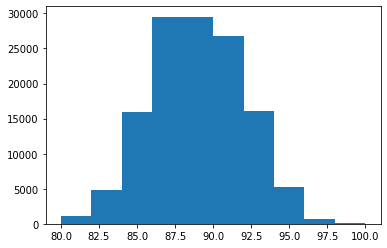

In [168]:
plt.figure()
plt.hist(x=df['points'])
plt.show()

In [6]:
from sklearn.preprocessing import KBinsDiscretizer

train = df.points.dropna().values.reshape(-1,1)

discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

discretizer.fit(train)

df['points_group'] = discretizer.transform(train)*5 + 80

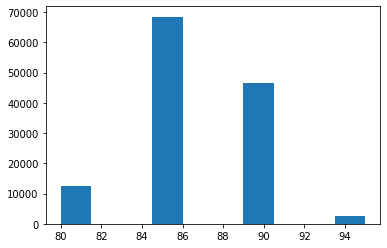

In [7]:
plt.figure()
plt.hist(x=df['points_group'])
plt.show()

In [8]:
df['points_group'].value_counts()

85.0    68496
90.0    46629
80.0    12430
95.0     2416
Name: points_group, dtype: int64

##Questão 3 - Crie o dataset abaixo: df_price_per_group = df[["country", "points_group","price"]].groupby(["country", "points_group"]).mean(). 
##Faça um merge left dele com o df principal, pelas chaves ["country", "points_group"] e aplique o sufixo '_per_group' nas variáveis do Segundo dataset. 
##Substitua os valores nulos de "Price" pelos valores na nova coluna "Price_per_group". Qual a nova média da variável "Price"?

In [16]:
df_price_per_group = df[["country", "points_group","price"]].groupby(["country", "points_group"]).mean()

In [17]:
df_price_per_group.head(3)

price
country   points_group           
Argentina 80.0          14.421735
          85.0          19.427708
          90.0          50.348745

In [18]:
df_merge = df.merge(df_price_per_group, how='left', on=["country", "points_group"], suffixes=(None, '_per_group'))
df_merge.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points_group,price_per_group
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,85.0,28.757327
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,85.0,16.554805
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,85.0,29.088498


In [19]:
df_merge['price'] = df_merge['price'].fillna(df_merge['price_per_group'])

In [21]:
df_merge['price'].mean()

35.60524860764637

##Questão 4 - Vamos tratar os outliers variável "Price" (lembre-se de recarregar o dataset). Remova os registros nulos e calcule o z score para cada registro. De acordo com essa técnica, quantos outliers tem na variável Preço?

In [170]:
df = pd.read_csv("/content/drive/MyDrive/winemag-data-130k-v2.csv", index_col=0)

In [171]:
df = df.dropna(subset=['price'])

In [172]:
df['price'].isnull().sum()

0

In [174]:
from scipy.stats import zscore
df['price_zscore'] = zscore(df['price'])
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,price_zscore
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-0.496401
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-0.520778
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,-0.545155


Resposta

In [192]:
sum((df['price_zscore'] > 3) | (df['price_zscore'] < -3))

1177

Resposta alternativa

In [49]:
df[(df['price_zscore'] > 3) | (df['price_zscore'] < -3)].shape[0]

1177

##Questão 5 - Veja a distribuição da variável "Country". Repare que há categorias muito pouco representativas. Se aplicarmos o princípio de Pareto, podemos filtrar somente os 7 países mais representativos da base que são:

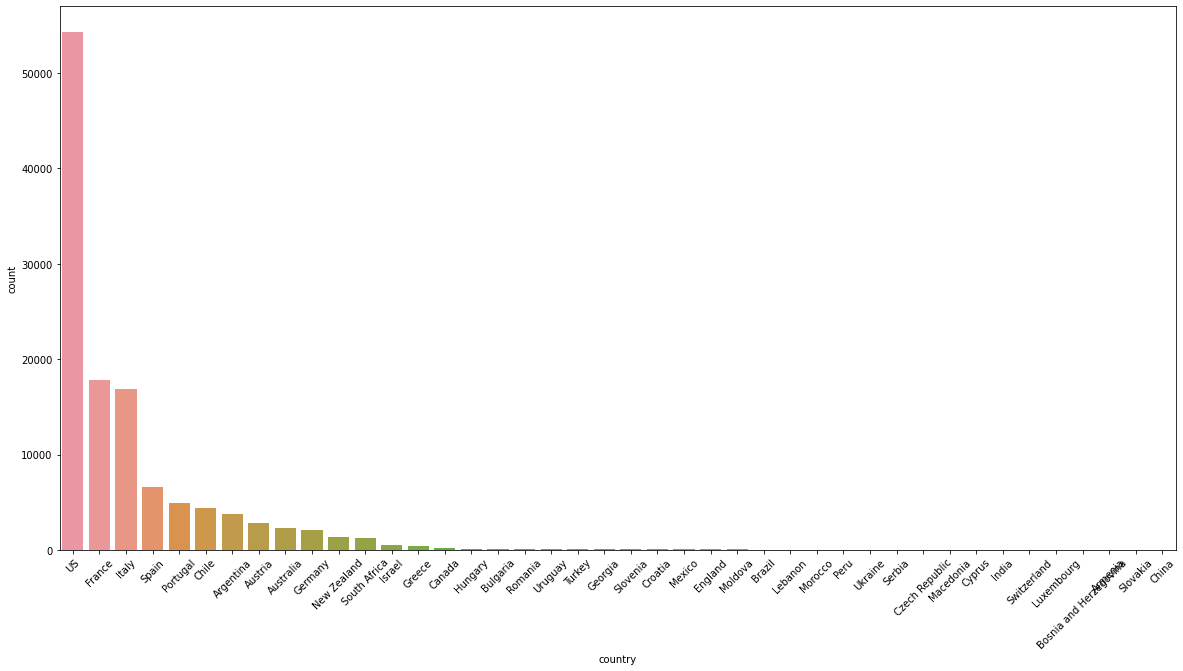

In [80]:
import seaborn as sns

x=df['country']

plt.figure(figsize=(20, 10))

sns.countplot(x=x, order=x.value_counts().index)

plt.xticks(rotation = 45)
plt.show()

In [200]:
df_paretto = pd.DataFrame(df['country'].value_counts()).cumsum()/df.shape[0]
df_paretto.rename(columns={'country':'country_cumsum%'}, inplace=True)
df_paretto.head(10)

,country_cumsum%
US,0.448564
France,0.595503
Italy,0.735317
Spain,0.789651
Portugal,0.829948
Chile,0.866452
Argentina,0.897499
Austria,0.920636
Australia,0.939599
Germany,0.957123


##Questão 6 - Filtre o país dos Estados Unidos. Aplique o One-Hot Encoding na variável "Province" considerando somente as categorias com pelo menos 100 registros. Qual o mínimo de novas categorias criadas?

In [201]:
df_us = df[df['country'] == 'US']
df_us.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,price_zscore
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-0.520778
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,-0.545155
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0.722456


In [100]:
df_us['province'].value_counts()

California           36104
Washington            8583
Oregon                5359
New York              2676
Virginia               770
Idaho                  190
Michigan               111
America                 95
Texas                   93
Colorado                68
New Mexico              45
Arizona                 40
Missouri                33
North Carolina          23
Pennsylvania            18
Ohio                    12
New Jersey               8
Massachusetts            7
Washington-Oregon        7
Illinois                 6
Iowa                     4
Nevada                   4
Vermont                  3
Connecticut              3
Kentucky                 1
Rhode Island             1
Hawaii                   1
Name: province, dtype: int64

In [109]:
cols_100 = ['California', 'Washington', 'Oregon', 'New York', 'Virginia', 'Idaho', 'Michigan'] 

In [202]:
df_us_100 = df_us[df_us['province'].isin(cols_100)]

In [203]:
pd.get_dummies(df_us_100['province'])

,California,Idaho,Michigan,New York,Oregon,Virginia,Washington
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0
10,1,0,0,0,0,0,0
12,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
129945,1,0,0,0,0,0,0
129949,1,0,0,0,0,0,0
129950,1,0,0,0,0,0,0
129952,1,0,0,0,0,0,0


##Questão 7 - A distribuição da variável Price é bastante desnormalizada, como podemos ver na imagem 1. Aplicando a transformação do Box-Cox, podemos melhorar muito sua distribuição como está representado na imagem 2. Assinale o valor do lambda que promoveu essa transformação (lembre de recarregar o dataset original)

In [114]:
df = pd.read_csv("/content/drive/MyDrive/winemag-data-130k-v2.csv", index_col=0)
df.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


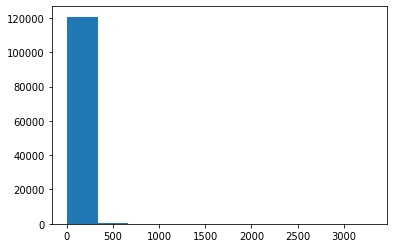

In [113]:
plt.hist(x=df.price);

In [116]:
df.price.isnull().sum()

8996

In [130]:
from sklearn.preprocessing import PowerTransformer

#data = df.price.dropna().values.reshape(-1,1)
data = df.price.values.reshape(-1,1)  

boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)

df['price_boxcox'] = boxcox_transformer.fit_transform(data)

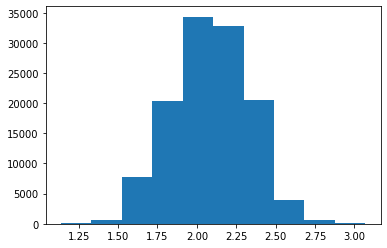

In [131]:
plt.hist(df.price_boxcox);

In [132]:
boxcox_transformer.lambdas_[0]

-0.2962150958947056

##Questão 8 - Vamos tratar o campo "Description". Assinale o resultado produzido pelo código da imagem ao lado.

In [133]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer, WordPunctTokenizer, WhitespaceTokenizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import string
import re

In [139]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#snowball_stemmer = SnowballStemmer('portuguese')

In [204]:
df_fr = df[df['country'] == 'France']

In [212]:
def clean_text(sentence):
  word_tokens = word_tokenize(sentence)
  new_words = [word for word in word_tokens if (word not in string.punctuation \
                                                and not re.match("[0-9]+",word))]
  clean_tokens = new_words[:]
  for token in clean_tokens:
    if token.lower() in stopwords.words('english'):
      clean_tokens.remove(token)
  return ' '.join(clean_tokens)

In [214]:
df_fr['description_treat'] = df_fr.description.apply(clean_text)
df_fr.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,price_zscore,description_treat
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,-0.277007,dry restrained wine offers spice profusion Bal...
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,-0.203875,has great depth flavor its fresh apple pear fr...
11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer,-0.130744,is dry wine spicy tight taut texture strongly ...
42,France,"This is a festive wine, with soft, ripe fruit ...",Nouveau,86,9.0,Beaujolais,Beaujolais,NaN,Roger Voss,@vossroger,Henry Fessy 2012 Nouveau (Beaujolais),Gamay,Henry Fessy,-0.642664,is festive wine soft ripe fruit acidity plus r...
49,France,"Soft and fruity, this is a generous, ripe wine...",Eté Indien,86,14.0,Beaujolais,Brouilly,NaN,Roger Voss,@vossroger,Vignerons de Bel Air 2011 Eté Indien (Brouilly),Gamay,Vignerons de Bel Air,-0.520778,Soft fruity is generous ripe wine 's full juic...


##Questão 9 - Como há 425 províncias diferentes, ao invés de criar uma variável para cada categoria, podemos criar uma variável que indica o preço médio daquela região para indicar se a província é conhecida por vinhos caros ou não. Agrupe o dataset por ["province", "price"] e calcule a média do preço. Depois faça um merge com o dataset original e crie uma variável que indique a diferença entre o preço do vinho e o preço médio da região. O terceiro registro está acima ou abaixo da média de sua região?

In [153]:
df = df.dropna(subset=['price'])
df_province_price = df[['province', 'price']].groupby(by='province').mean().reset_index()
df_province_price.head(3)

,province,price
0,Achaia,23.000000
1,Aconcagua Costa,23.074074
2,Aconcagua Valley,40.298246


In [154]:
df_merge = df.merge(df_province_price, how='left', on=["province"], suffixes=(None, '_per_province'))
df_merge.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,price_boxcox,price_per_province
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,1.862305,29.141975
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,1.831054,36.545064
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,1.796766,32.432432


In [155]:
df_merge['price_province_delta'] = df_merge['price'] - df_merge['price_per_province']
df_merge.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,price_boxcox,price_per_province,price_province_delta
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,1.862305,29.141975,-14.141975
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,1.831054,36.545064,-22.545064
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,1.796766,32.432432,-19.432432
